# Corelation and defining Income_Class and Crime_class

In [2]:
# Import the packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from datetime import datetime
import pytz

import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd
%pip install folium
import folium
from shapely.geometry import Point
from shapely import wkt

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


## Code comments on Toronto file.

In [3]:
#Final _data frame file
df_1 = pd.read_csv('housing_van_clean_with_best_buffers_v2.csv')
df_1.head(2)
df_1.drop(columns=df_1.columns[1], inplace=True)

df_1

neighbourhood          street address   latitude   longitude  \
0       arbutus ridge         2795 w 37th ave  49.238765 -123.167839   
1       arbutus ridge         4422 quesnel dr  49.247018 -123.168268   
2       arbutus ridge        4101 yew st #304  49.248583 -123.155246   
3       arbutus ridge         2556 w 20th ave  49.254284 -123.163295   
4       arbutus ridge         2638 w 22nd ave  49.252494 -123.164150   
...               ...                     ...        ...         ...   
1200  west point grey      4190 w 11th avenue  49.262489 -123.199551   
1201  west point grey       4517 w 4th avenue  49.269329 -123.210104   
1202  west point grey  301 4375 w 10th avenue  49.264023 -123.205245   
1203  west point grey   106 3731 w 6th avenue  49.267160 -123.186370   
1204  west point grey       3822 w 2nd avenue  49.270197 -123.188209   

                           geometry    price  bedrooms  bathrooms  \
0     point (-123.167839 49.238765)  5750000         5          7   
1     point (-123.168268 49.247018)  8680000         5          6   
2     point (-123.155246 49.248583)   699900         1          1   
3     point (-123.163295 49.254284)  4290000         6          5   
4      point (-123.16415 49.252494)  5780000         4          5   
...                             ...      ...       ...        ...   
1200  point (-123.199551 49.262489)  3088000         4          3   
1201  point (-123.210104 49.269329)  6999000         4          4   
1202  point (-123.205245 49.264023)   799000         1          1   
1203    point (-123.18637 49.26716)   585800         1          1   
1204  point (-123.188209 49.270197)  4998000         5          4   

      total_crimes (2020-2024)  average_total_crime (per_year)  ...  \
0                         1417                             283  ...   
1                         1417                             283  ...   
2                         1417                             283  ...   
3                         1417                             283  ...   
4                         1417                             283  ...   
...                        ...                             ...  ...   
1200                      1463                             293  ...   
1201                      1463                             293  ...   
1202                      1463                             293  ...   
1203                      1463                             293  ...   
1204                      1463                             293  ...   

      bus stop_best_buffer_area_1.5_values  pub_best_buffer_area_0.5_values  \
0                                       46                                0   
1                                       47                                0   
2                                       50                                0   
3                                       73                                0   
4                                       69                                0   
...                                    ...                              ...   
1200                                    39                                0   
1201                                    41                                0   
1202                                    45                                0   
1203                                    48                                1   
1204                                    45                                0   

      restaurant_best_buffer_area_1.5_values  \
0                                         23   
1                                          3   
2                                          8   
3                                         30   
4                                         20   
...                                      ...   
1200                                      17   
1201                                      15   
1202                                      14   
1203                            

## Crime and Income percentages

Defining the crime severity %age  as the ratio between the crime and total crimes reported in each neighbourhood.

In [4]:
# crime=df_1.iloc[:,8:16]
# crime['%severe_crime']= df_1['total_severe_crimes (2020-2024)']*100/df_1['total_crimes (2020-2024)']
# crime['%moderate_crime']= df_1['total_moderate_crimes (2020-2024)']*100/df_1['total_crimes (2020-2024)']
# crime['%minor_crime']= df_1['total_minor_crimes (2020-2024)']*100/df_1['total_crimes (2020-2024)']
# j=df_1['neighbourhood']
# crime=pd.concat([j,crime],axis=1)
# crime.head()



In [5]:
# #if we assign weights to crime.

# crime=df_1.iloc[:,8:16]

# crime['total']= df_1['total_severe_crimes (2020-2024)']*250 + df_1['total_moderate_crimes (2020-2024)']*5 + df_1['total_minor_crimes (2020-2024)']
# crime['%severe_crime']= df_1['total_severe_crimes (2020-2024)']*250*100/crime['total']
# crime['%moderate_crime']= df_1['total_moderate_crimes (2020-2024)']*100/crime['total']*5
# crime['%minor_crime']= df_1['total_minor_crimes (2020-2024)']*100/crime['total']*2
# j=df_1['neighbourhood']
# crime=pd.concat([j,crime],axis=1)
# crime.drop('total', axis=1, inplace=True)
# crime.head()



In [6]:
#if we assign weights to crime.

crime=df_1.iloc[:,8:16]

crime['total']= df_1['total_severe_crimes (2020-2024)']*200 + df_1['total_moderate_crimes (2020-2024)']*75 + df_1['total_minor_crimes (2020-2024)']*10
crime['%severe_crime']= df_1['total_severe_crimes (2020-2024)']*200*100/crime['total']
crime['%moderate_crime']= df_1['total_moderate_crimes (2020-2024)']*100/crime['total']*75
crime['%minor_crime']= df_1['total_minor_crimes (2020-2024)']*100/crime['total']*10
j=df_1['neighbourhood']
crime=pd.concat([j,crime],axis=1)
crime.drop('total', axis=1, inplace=True)
crime.head()



neighbourhood  total_crimes (2020-2024)  average_total_crime (per_year)  \
0  arbutus ridge                      1417                             283   
1  arbutus ridge                      1417                             283   
2  arbutus ridge                      1417                             283   
3  arbutus ridge                      1417                             283   
4  arbutus ridge                      1417                             283   

   total_severe_crimes (2020-2024)  average_severe_crimes (per_year)  \
0                               80                                16   
1                               80                                16   
2                               80                                16   
3                               80                                16   
4                               80                                16   

   total_moderate_crimes (2020-2024)  average_moderate_crimes (per_year)  \
0                                278                                  56   
1                                278                                  56   
2                                278                                  56   
3                                278                                  56   
4                                278                                  56   

   total_minor_crimes (2020-2024)  average_minor_crimes (per_year)  \
0                            1059                              212   
1                            1059                              212   
2                            1059                              212   
3                            1059                              212   
4                            1059                              212   

   %severe_crime  %moderate_crime  %minor_crime  
0      33.726813        43.950253     22.322934  
1      33.726813        43.950253     22.322934  
2      33.726813        43.950253     22.322934  
3      33.726813        43.950253     22.322934  
4      33.726813        43.950253     22.322934

In [7]:
#Income %age distriburion

income=df_1.iloc[:,16:22]
income['Total_pop']= df_1.iloc[:, 16:22].sum(axis=1) 
income['%high_class']= income.iloc[:,4:6].sum(axis=1)*100/income['Total_pop']
income['%middle_class']= income.iloc[:,2:4].sum(axis=1)*100/income['Total_pop']
income['%low_class']= income.iloc[:,0:2].sum(axis=1)*100/income['Total_pop']

j=df_1['neighbourhood'] #get the name of neighbourhoods

income=pd.concat([j,income],axis=1)
income


neighbourhood  class 6g  class 5g  class 4g  class 3g  class 2g  \
0       arbutus ridge      3185      2670      1090      2455       855   
1       arbutus ridge      3185      2670      1090      2455       855   
2       arbutus ridge      3185      2670      1090      2455       855   
3       arbutus ridge      3185      2670      1090      2455       855   
4       arbutus ridge      3185      2670      1090      2455       855   
...               ...       ...       ...       ...       ...       ...   
1200  west point grey      2355      2320      1055      2780       910   
1201  west point grey      2355      2320      1055      2780       910   
1202  west point grey      2355      2320      1055      2780       910   
1203  west point grey      2355      2320      1055      2780       910   
1204  west point grey      2355      2320      1055      2780       910   

      class 1g  Total_pop  %high_class  %middle_class  %low_class  
0          870      11125    15.505618      31.865169   52.629213  
1          870      11125    15.505618      31.865169   52.629213  
2          870      11125    15.505618      31.865169   52.629213  
3          870      11125    15.505618      31.865169   52.629213  
4          870      11125    15.505618      31.865169   52.629213  
...        ...        ...          ...            ...         ...  
1200      1165      10585    19.603212      36.230515   44.166273  
1201      1165      10585    19.603212      36.230515   44.166273  
1202      1165      10585    19.603212      36.230515   44.166273  
1203      1165      10585    19.603212      36.230515   44.166273  
1204      1165      10585    19.603212      36.230515   44.166273  

[1205 rows x 11 columns]

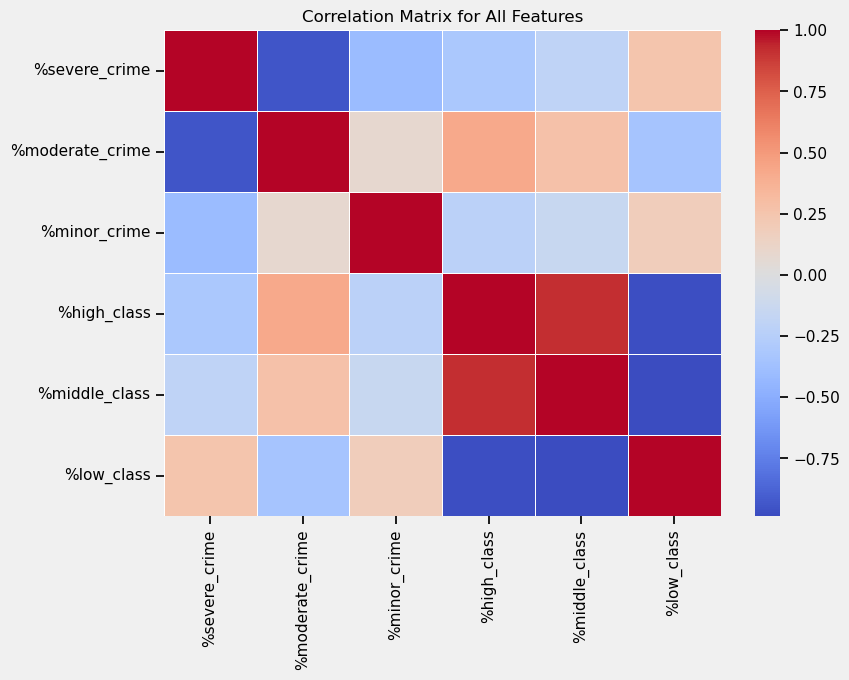

In [8]:
# Combine numerical and encoded categorical features
m=crime.iloc[:,9:12]
n=income.iloc[:,8:11]
combined_df = pd.concat([m, n], axis=1)
combined_df
# Compute the correlation matrix
full_correlation_matrix = combined_df.corr()
df=pd.DataFrame(full_correlation_matrix)
# Print the full correlation matrix
(full_correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Features')
plt.show()


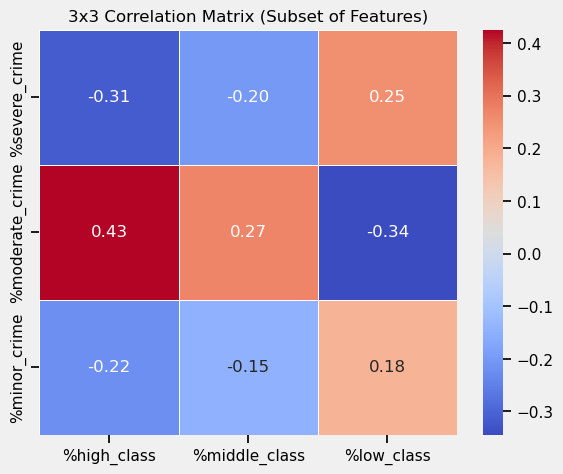

%severe_crime  %moderate_crime  %minor_crime  %high_class  \
0         33.726813        43.950253     22.322934    15.505618   
1         33.726813        43.950253     22.322934    15.505618   
2         33.726813        43.950253     22.322934    15.505618   
3         33.726813        43.950253     22.322934    15.505618   
4         33.726813        43.950253     22.322934    15.505618   
...             ...              ...           ...          ...   
1200      37.054192        43.492358     19.453451    19.603212   
1201      37.054192        43.492358     19.453451    19.603212   
1202      37.054192        43.492358     19.453451    19.603212   
1203      37.054192        43.492358     19.453451    19.603212   
1204      37.054192        43.492358     19.453451    19.603212   

      %middle_class  %low_class  
0         31.865169   52.629213  
1         31.865169   52.629213  
2         31.865169   52.629213  
3         31.865169   52.629213  
4         31.865169   52.629213  
...             ...         ...  
1200      36.230515   44.166273  
1201      36.230515   44.166273  
1202      36.230515   44.166273  
1203      36.230515   44.166273  
1204      36.230515   44.166273  

[1205 rows x 6 columns]

In [9]:
#Combine the selected columns
combined_df = pd.concat([m, n], axis=1)

# Compute the 3x3 correlation matrix
small_correlation_matrix = combined_df.corr().iloc[:3, 3:]

# Plot the 3x3 correlation heatmap
plt.figure(figsize=(6, 5))  # Adjust size as needed
sns.heatmap(small_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('3x3 Correlation Matrix (Subset of Features)')
plt.show()
combined_df

### Defining the 9 categorical classes based on %age contibution

In [10]:
### dCombining the sets
final_df=pd.concat([j,combined_df],axis=1)
final_df

neighbourhood  %severe_crime  %moderate_crime  %minor_crime  \
0       arbutus ridge      33.726813        43.950253     22.322934   
1       arbutus ridge      33.726813        43.950253     22.322934   
2       arbutus ridge      33.726813        43.950253     22.322934   
3       arbutus ridge      33.726813        43.950253     22.322934   
4       arbutus ridge      33.726813        43.950253     22.322934   
...               ...            ...              ...           ...   
1200  west point grey      37.054192        43.492358     19.453451   
1201  west point grey      37.054192        43.492358     19.453451   
1202  west point grey      37.054192        43.492358     19.453451   
1203  west point grey      37.054192        43.492358     19.453451   
1204  west point grey      37.054192        43.492358     19.453451   

      %high_class  %middle_class  %low_class  
0       15.505618      31.865169   52.629213  
1       15.505618      31.865169   52.629213  
2       15.505618      31.865169   52.629213  
3       15.505618      31.865169   52.629213  
4       15.505618      31.865169   52.629213  
...           ...            ...         ...  
1200    19.603212      36.230515   44.166273  
1201    19.603212      36.230515   44.166273  
1202    19.603212      36.230515   44.166273  
1203    19.603212      36.230515   44.166273  
1204    19.603212      36.230515   44.166273  

[1205 rows x 7 columns]

In [11]:
##Class assignment

# Initialize new columns with default values
final_df['Income_Class'] = None
final_df['Crime_Class'] = None

# Iterate over rows to apply the logic
for index, row in income.iterrows():
    # Calculate column1 + column2
    total = row['%high_class'] + row['%middle_class']
    high = row['%high_class'] 
    # Assign the Class based on total of column1 and column2
    if total >=35: 
        if high >18:
            final_df.at[index, 'Income_Class'] = 'High Class'
        else:
            final_df.at[index, 'Income_Class'] = 'Moderate Class'
    else:
        final_df.at[index, 'Income_Class'] = 'Low Class'

    # Now check crime-related conditions and assign crime class
    if final_df.iloc[index, 1] >= 50.0:  # Example crime condition
        final_df.at[index, 'Crime_Class'] = 'Severe Crime'
    elif final_df.iloc[index, 2] <=40:  # 30 for weighted, 40 without weight
        final_df.at[index, 'Crime_Class'] = 'Minor Crime'
    else:
        final_df.at[index, 'Crime_Class'] = 'Moderate Crime'

# Print the updated DataFrame
final_df.iloc[:,1].mode()


0    66.677883
Name: %severe_crime, dtype: float64

In [12]:
final_df['Crime_Class'].unique()

array(['Moderate Crime', 'Severe Crime', 'Minor Crime'], dtype=object)

In [13]:
final_df

neighbourhood  %severe_crime  %moderate_crime  %minor_crime  \
0       arbutus ridge      33.726813        43.950253     22.322934   
1       arbutus ridge      33.726813        43.950253     22.322934   
2       arbutus ridge      33.726813        43.950253     22.322934   
3       arbutus ridge      33.726813        43.950253     22.322934   
4       arbutus ridge      33.726813        43.950253     22.322934   
...               ...            ...              ...           ...   
1200  west point grey      37.054192        43.492358     19.453451   
1201  west point grey      37.054192        43.492358     19.453451   
1202  west point grey      37.054192        43.492358     19.453451   
1203  west point grey      37.054192        43.492358     19.453451   
1204  west point grey      37.054192        43.492358     19.453451   

      %high_class  %middle_class  %low_class    Income_Class     Crime_Class  
0       15.505618      31.865169   52.629213  Moderate Class  Moderate Crime  
1       15.505618      31.865169   52.629213  Moderate Class  Moderate Crime  
2       15.505618      31.865169   52.629213  Moderate Class  Moderate Crime  
3       15.505618      31.865169   52.629213  Moderate Class  Moderate Crime  
4       15.505618      31.865169   52.629213  Moderate Class  Moderate Crime  
...           ...            ...         ...             ...             ...  
1200    19.603212      36.230515   44.166273      High Class  Moderate Crime  
1201    19.603212      36.230515   44.166273      High Class  Moderate Crime  
1202    19.603212      36.230515   44.166273      High Class  Moderate Crime  
1203    19.603212      36.230515   44.166273      High Class  Moderate Crime  
1204    19.603212      36.230515   44.166273      High Class  Moderate Crime  

[1205 rows x 9 columns]

In [14]:
main_df = pd.concat([df_1[['street address', 'latitude', 'longitude']], 
                     final_df[['neighbourhood', 'Income_Class', 'Crime_Class']]], axis=1)
main_df

street address   latitude   longitude    neighbourhood  \
0            2795 w 37th ave  49.238765 -123.167839    arbutus ridge   
1            4422 quesnel dr  49.247018 -123.168268    arbutus ridge   
2           4101 yew st #304  49.248583 -123.155246    arbutus ridge   
3            2556 w 20th ave  49.254284 -123.163295    arbutus ridge   
4            2638 w 22nd ave  49.252494 -123.164150    arbutus ridge   
...                      ...        ...         ...              ...   
1200      4190 w 11th avenue  49.262489 -123.199551  west point grey   
1201       4517 w 4th avenue  49.269329 -123.210104  west point grey   
1202  301 4375 w 10th avenue  49.264023 -123.205245  west point grey   
1203   106 3731 w 6th avenue  49.267160 -123.186370  west point grey   
1204       3822 w 2nd avenue  49.270197 -123.188209  west point grey   

        Income_Class     Crime_Class  
0     Moderate Class  Moderate Crime  
1     Moderate Class  Moderate Crime  
2     Moderate Class  Moderate Crime  
3     Moderate Class  Moderate Crime  
4     Moderate Class  Moderate Crime  
...              ...             ...  
1200      High Class  Moderate Crime  
1201      High Class  Moderate Crime  
1202      High Class  Moderate Crime  
1203      High Class  Moderate Crime  
1204      High Class  Moderate Crime  

[1205 rows x 6 columns]

In [15]:
main_df.to_csv('Income_Crime_df_classes_neigh_Van.csv', index=True)


## Visualisation

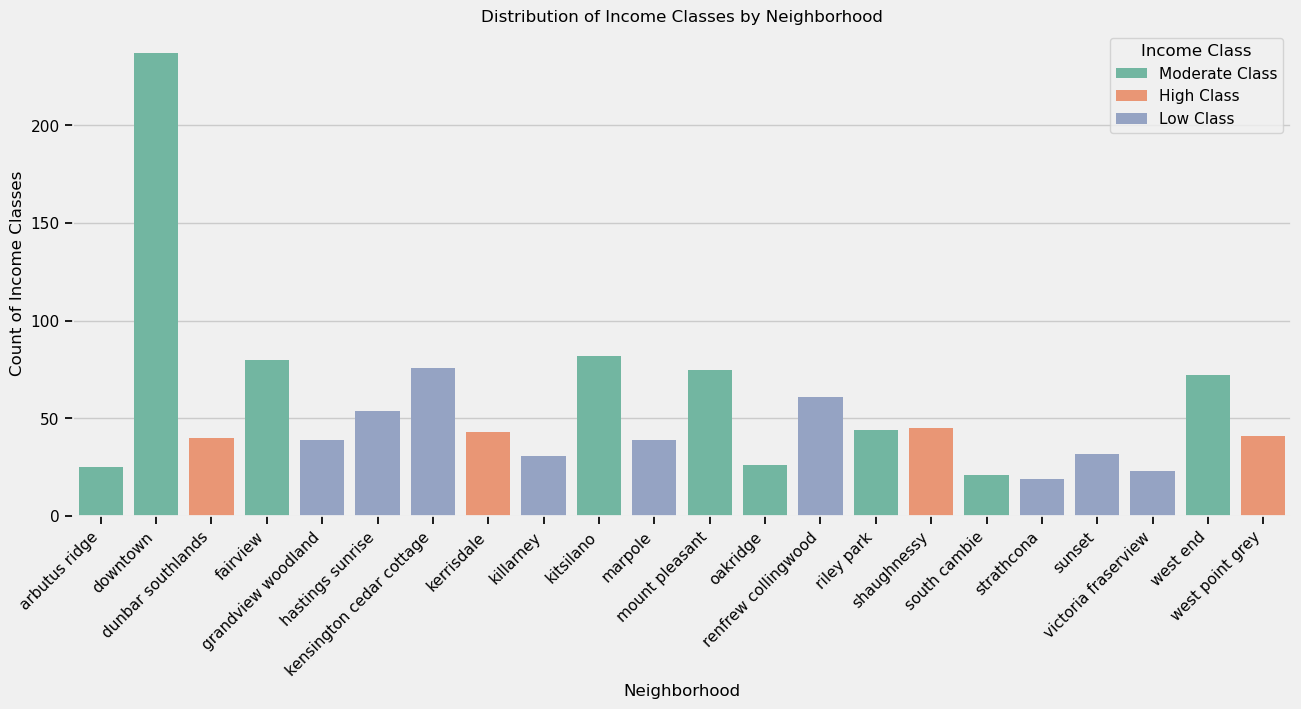

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'neighborhood' is in 'df' and 'income_class' is the income category column
plt.figure(figsize=(14, 6))
sns.countplot(data=final_df, x='neighbourhood', hue='Income_Class', palette='Set2')

plt.xlabel('Neighborhood')
plt.ylabel('Count of Income Classes')
plt.title('Distribution of Income Classes by Neighborhood')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Income Class')
plt.show()


In [17]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(final_df, 
                 path=['neighbourhood', 'Income_Class'], 
                 title="Treemap of Income Classes by Neighborhood",
                 color='Income_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'lightgreen'})

fig.show()


In [18]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(final_df, 
                 path=['neighbourhood', 'Crime_Class'],
                 title="Treemap of Crime Classes by Neighborhood",
                 color='Crime_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'red'})

fig.show()


In [19]:
#grouping the data, Neighbourhood wise
df=final_df.copy()
grouped_df = df.groupby(['neighbourhood', 'Income_Class', 'Crime_Class']).size().reset_index(name='count')
(grouped_df)


neighbourhood    Income_Class     Crime_Class  count
0              arbutus ridge  Moderate Class  Moderate Crime     25
1                   downtown  Moderate Class    Severe Crime    237
2          dunbar southlands      High Class     Minor Crime     40
3                   fairview  Moderate Class     Minor Crime     80
4         grandview woodland       Low Class    Severe Crime     39
5           hastings sunrise       Low Class    Severe Crime     54
6   kensington cedar cottage       Low Class    Severe Crime     76
7                 kerrisdale      High Class  Moderate Crime     43
8                  killarney       Low Class    Severe Crime     31
9                  kitsilano  Moderate Class     Minor Crime     82
10                   marpole       Low Class     Minor Crime     39
11            mount pleasant  Moderate Class     Minor Crime     75
12                  oakridge  Moderate Class  Moderate Crime     26
13       renfrew collingwood       Low Class     Minor Crime     61
14                riley park  Moderate Class     Minor Crime     44
15               shaughnessy      High Class  Moderate Crime     45
16              south cambie  Moderate Class  Moderate Crime     21
17                strathcona       Low Class    Severe Crime     19
18                    sunset       Low Class    Severe Crime     32
19       victoria fraserview       Low Class    Severe Crime     23
20                  west end  Moderate Class    Severe Crime     72
21           west point grey      High Class  Moderate Crime     41

In [20]:
unique_counts = grouped_df['Crime_Class'].value_counts()
print(unique_counts)


Crime_Class
Severe Crime      9
Minor Crime       7
Moderate Crime    6
Name: count, dtype: int64


In [21]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(grouped_df, 
                 path=['neighbourhood', 'Income_Class'], 
                 title="Treemap of Income Classes by Neighborhood",
                 color='Income_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'red'})

fig.show()


In [22]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(grouped_df, 
                 path=['neighbourhood', 'Crime_Class'], 
                 title="Treemap of crime Classes by Neighborhood",
                 color='Crime_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'red'})

fig.show()


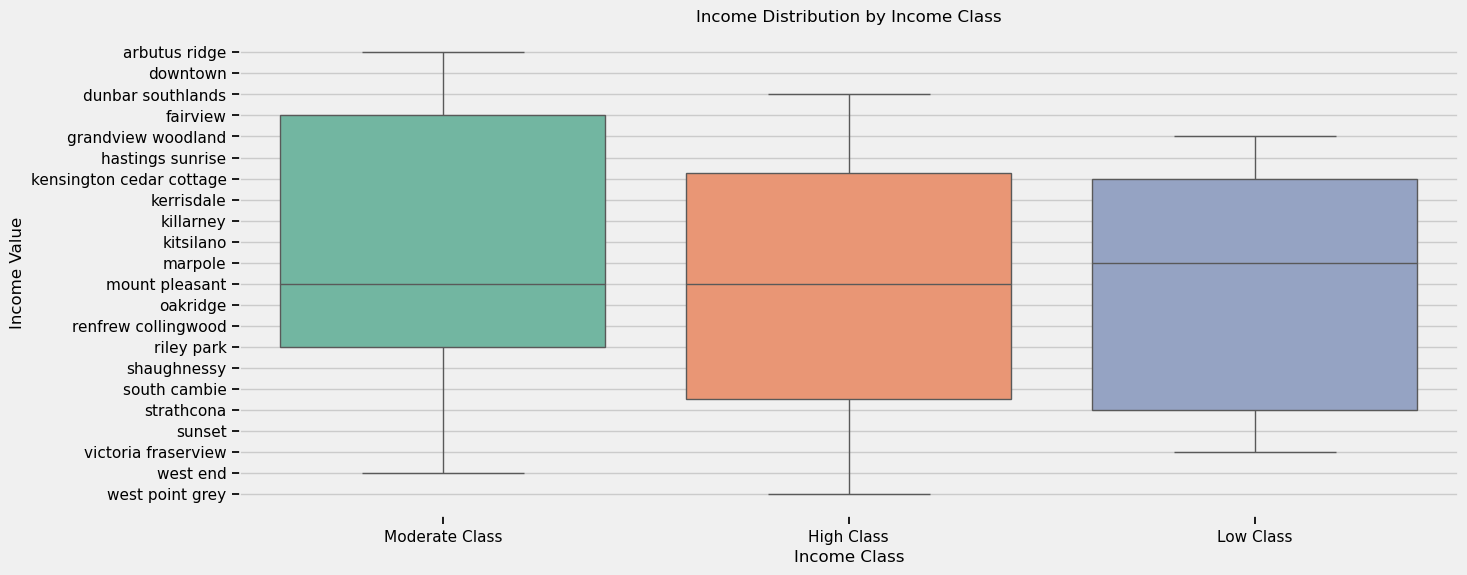

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_df` has 'neighbourhood' and 'Class' columns, and the income column is called 'income_value'

plt.figure(figsize=(14, 6))

# Box plot showing income distribution by income class (hue by income class)
sns.boxplot(data=grouped_df, x='Income_Class', y='neighbourhood', palette='Set2')

# Add labels and title
plt.xlabel('Income Class')
plt.ylabel('Income Value')
plt.title('Income Distribution by Income Class')
plt.xticks(rotation=0)
plt.show()


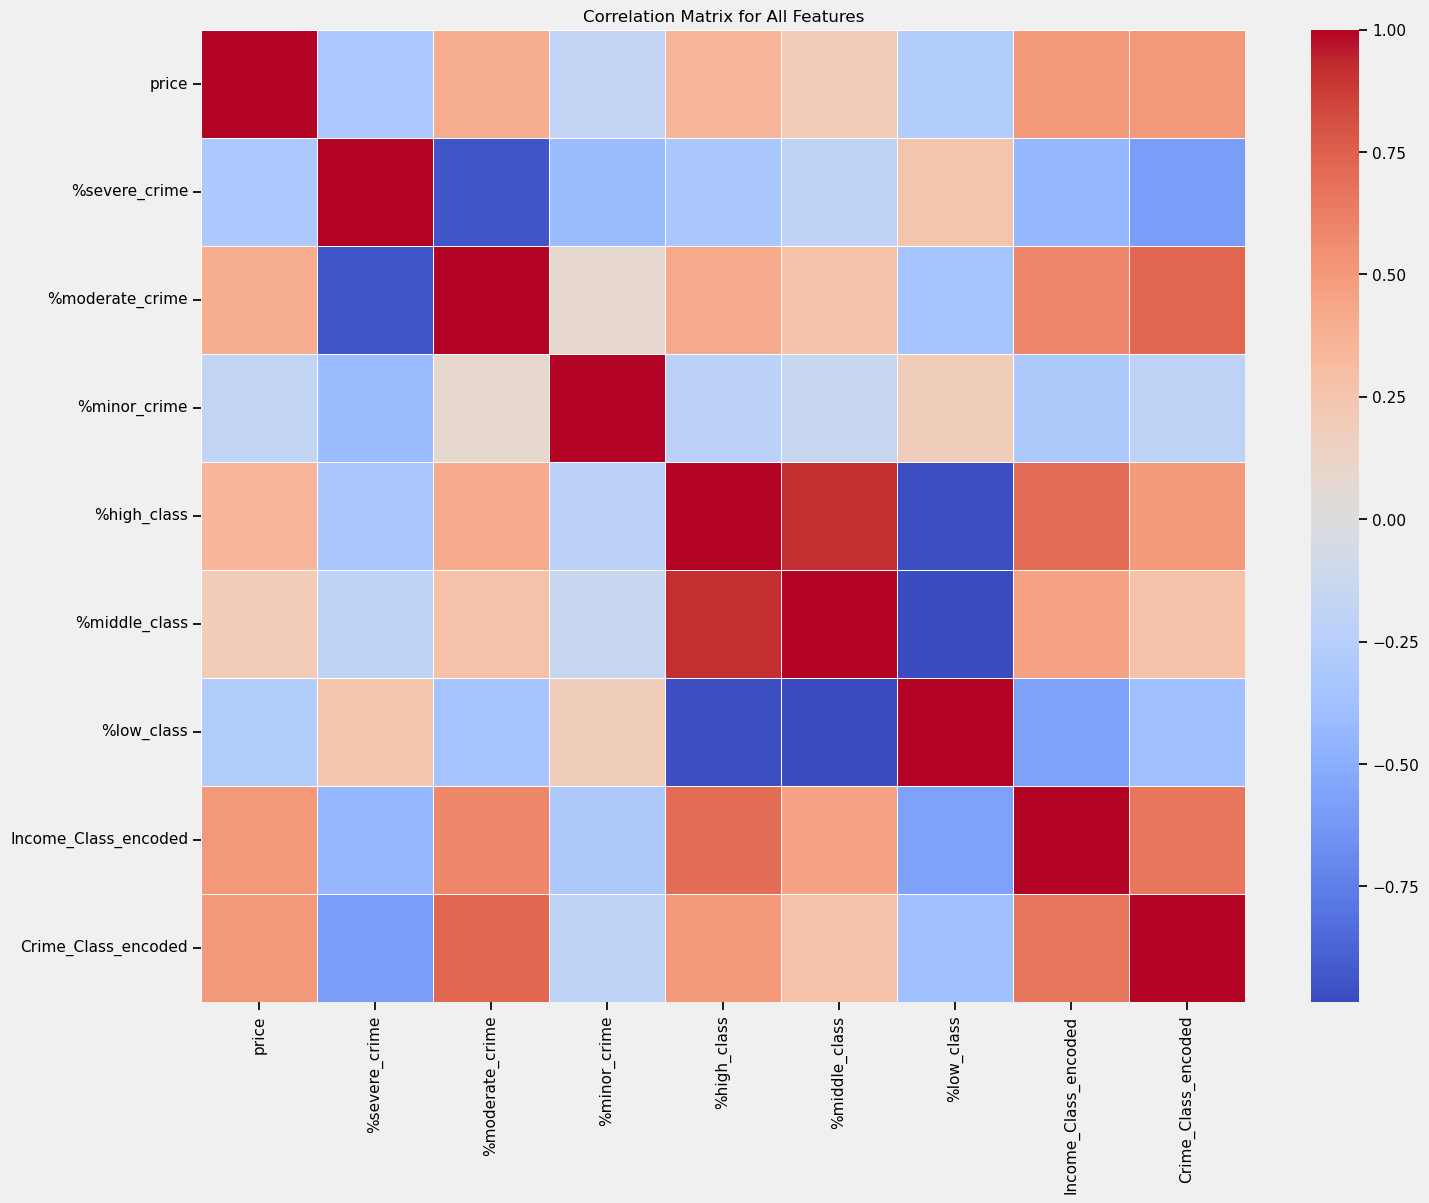

In [24]:
# Prepare the dataset: Encode categorical features
# Compute correlations of categorical columns with Price using mean encoding
categorical_columns = final_df.select_dtypes(include=['object', 'category']).columns
df= pd.concat([df_1['price'],final_df],axis=1)
for col in categorical_columns:
    # Target encode the categorical column
    target_mean = df.groupby(col)['price'].mean()
    df[f"{col}_encoded"] = df[col].map(target_mean)

# Select numerical features and encoded categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns
encoded_categorical_features = [f"{col}_encoded" for col in categorical_columns]

# Combine numerical and encoded categorical features
all_features = list(numerical_features) + encoded_categorical_features
combined_df = df[all_features]
combined_df.drop(columns=['neighbourhood_encoded'], inplace=True)
# Compute the correlation matrix
full_correlation_matrix = combined_df.corr()
df2=pd.DataFrame(full_correlation_matrix)
# Print the full correlation matrix
(full_correlation_matrix)
# Compute the 3x3 correlation matrix
small_correlation_matrix = combined_df.corr().iloc[:9, :9]
# Plot the correlation heatmap
plt.figure(figsize=(15, 12))  # Adjust size as needed
sns.heatmap(small_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Features')
plt.show()


In [25]:
small_correlation_matrix['price']

price                   1.000000
%severe_crime          -0.305491
%moderate_crime         0.397214
%minor_crime           -0.172746
%high_class             0.354370
%middle_class           0.194843
%low_class             -0.268026
Income_Class_encoded    0.509026
Crime_Class_encoded     0.509504
Name: price, dtype: float64

In [26]:
combined_df

price  %severe_crime  %moderate_crime  %minor_crime  %high_class  \
0     5750000      33.726813        43.950253     22.322934    15.505618   
1     8680000      33.726813        43.950253     22.322934    15.505618   
2      699900      33.726813        43.950253     22.322934    15.505618   
3     4290000      33.726813        43.950253     22.322934    15.505618   
4     5780000      33.726813        43.950253     22.322934    15.505618   
...       ...            ...              ...           ...          ...   
1200  3088000      37.054192        43.492358     19.453451    19.603212   
1201  6999000      37.054192        43.492358     19.453451    19.603212   
1202   799000      37.054192        43.492358     19.453451    19.603212   
1203   585800      37.054192        43.492358     19.453451    19.603212   
1204  4998000      37.054192        43.492358     19.453451    19.603212   

      %middle_class  %low_class  Income_Class_encoded  Crime_Class_encoded  \
0         31.865169   52.629213          2.085649e+06         6.571195e+06   
1         31.865169   52.629213          2.085649e+06         6.571195e+06   
2         31.865169   52.629213          2.085649e+06         6.571195e+06   
3         31.865169   52.629213          2.085649e+06         6.571195e+06   
4         31.865169   52.629213          2.085649e+06         6.571195e+06   
...             ...         ...                   ...                  ...   
1200      36.230515   44.166273          6.963687e+06         6.571195e+06   
1201      36.230515   44.166273          6.963687e+06         6.571195e+06   
1202      36.230515   44.166273          6.963687e+06         6.571195e+06   
1203      36.230515   44.166273          6.963687e+06         6.571195e+06   
1204      36.230515   44.166273          6.963687e+06         6.571195e+06   

      Income_Class_encoded  Crime_Class_encoded  
0             2.085649e+06         6.571195e+06  
1             2.085649e+06         6.571195e+06  
2             2.085649e+06         6.571195e+06  
3             2.085649e+06         6.571195e+06  
4             2.085649e+06         6.571195e+06  
...                    ...                  ...  
1200          6.963687e+06         6.571195e+06  
1201          6.963687e+06         6.571195e+06  
1202          6.963687e+06         6.571195e+06  
1203          6.963687e+06         6.571195e+06  
1204          6.963687e+06         6.571195e+06  

[1205 rows x 11 columns]

In [27]:
from folium import Choropleth

neighbourhoods = gpd.read_file('vancouver.geojson') 


plot_geography = neighbourhoods.to_crs(epsg=4326)[['name', 'geometry']]
plot_geography = plot_geography.set_index('name')
plot_geography.head()

# Step 3: Merge these columns into hos_t based on the "Neighbourhood" index

income_c=grouped_df['Income_Class']
neighbourhoods = neighbourhoods.merge(income_c, how='left', left_index=True, right_index=True)

plot_data=neighbourhoods[['name','Income_Class']]
plot_data=plot_data.dropna()

plot_data['Income_Class'] = plot_data['Income_Class'].astype('category').cat.codes

# Optional: Save the mapping for reference
income_class_mapping = dict(enumerate(neighbourhoods['Income_Class'].astype('category').cat.categories))

# Create a base map
map_1 = folium.Map(location=[49.2827, -123.1207], 
                 tiles='cartodbpositron',
                 zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=plot_geography.__geo_interface__, 
           columns=['name', 'Income_Class'],
           data=plot_data, 
           key_on='feature.id', 
           fill_color='YlOrRd', 
           legend_name='Income_Class'
          ).add_to(map_1)

# Print the mapping
for code, label in income_class_mapping.items():
    print(f"Code {code} corresponds to {label}")

# Display the map
map_1

#neighbourhoods

Code 0 corresponds to High Class
Code 1 corresponds to Low Class
Code 2 corresponds to Moderate Class


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [28]:
from folium import Choropleth

neighbourhoods = gpd.read_file('vancouver.geojson') 


plot_geography = neighbourhoods.to_crs(epsg=4326)[['name', 'geometry']]
plot_geography = plot_geography.set_index('name')
plot_geography.head()

crime_c=grouped_df['Crime_Class']
neighbourhoods = neighbourhoods.merge(crime_c, how='left', left_index=True, right_index=True)

plot_data=neighbourhoods[['name','Crime_Class']]
plot_data=plot_data.dropna()
plot_data['Crime_Class'] = plot_data['Crime_Class'].astype('category').cat.codes
# Optional: Save the mapping for reference
income_class_mapping = dict(enumerate(neighbourhoods['Crime_Class'].astype('category').cat.categories))

# Create a base map
map_1 = folium.Map(location=[49.2827, -123.1207], 
                 tiles='cartodbpositron',
                 zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=plot_geography.__geo_interface__, 
           columns=['name', 'Crime_Class'],
           data=plot_data, 
           key_on='feature.id', 
           fill_color='YlOrRd', 
           legend_name='Crime_Class'
          ).add_to(map_1)
# Print the mapping
for code, label in income_class_mapping.items():
    print(f"Code {code} corresponds to {label}")

# Display the map
map_1



Code 0 corresponds to Minor Crime
Code 1 corresponds to Moderate Crime
Code 2 corresponds to Severe Crime


## getting to know the importance of features

In [29]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# First, split the data into 70% and 30%
df_p = df.loc[:, ['price', 'Income_Class_encoded', 'Crime_Class_encoded']]

train, test = train_test_split(df_p, test_size=0.15, random_state=42)

# Check the sizes of each split
print(f"Train size: {len(train)} ({len(train) / len(df):.2%})")

print(f"Test size: {len(test)} ({len(test) / len(df):.2%})")
train

Train size: 1024 (84.98%)
Test size: 181 (15.02%)


price  Income_Class_encoded  Crime_Class_encoded
405    1089900          1.549200e+06         1.704564e+06
428    2278000          1.549200e+06         1.704564e+06
613     879000          1.549200e+06         1.704564e+06
964   10280000          6.963687e+06         6.571195e+06
738     598800          1.549200e+06         1.953426e+06
...        ...                   ...                  ...
1044   2998000          1.549200e+06         1.704564e+06
1095    395000          2.085649e+06         1.704564e+06
1130   5500000          2.085649e+06         1.704564e+06
860     828000          1.549200e+06         1.953426e+06
1126   2350000          2.085649e+06         1.704564e+06

[1024 rows x 3 columns]

In [30]:
from sklearn.model_selection import KFold

train_cleaned = train.dropna()
y = train_cleaned['price']
train_cleaned.drop(columns=['price'], inplace=True)
X = (train_cleaned)

# Labels


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through folds
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}")
    
    # Split into train and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
    print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")
    print()


Fold 1
X_train shape: (819, 2), X_val shape: (205, 2)
y_train shape: (819,), y_val shape: (205,)

Fold 2
X_train shape: (819, 2), X_val shape: (205, 2)
y_train shape: (819,), y_val shape: (205,)

Fold 3
X_train shape: (819, 2), X_val shape: (205, 2)
y_train shape: (819,), y_val shape: (205,)

Fold 4
X_train shape: (819, 2), X_val shape: (205, 2)
y_train shape: (819,), y_val shape: (205,)

Fold 5
X_train shape: (820, 2), X_val shape: (204, 2)
y_train shape: (820,), y_val shape: (204,)



In [31]:
# Instantiate a classifier model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)

print(r2_score(y_val, y_pred))

0.35572222576038803


In [32]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation on the training data
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Calculate mean MSE
# mean_cv_mse = -cv_scores.mean()
# print(f"Mean Cross-Validated MSE: {mean_cv_mse}")


Top Features Based on Importance:
                Feature  Importance
1   Crime_Class_encoded    0.665756
0  Income_Class_encoded    0.334244


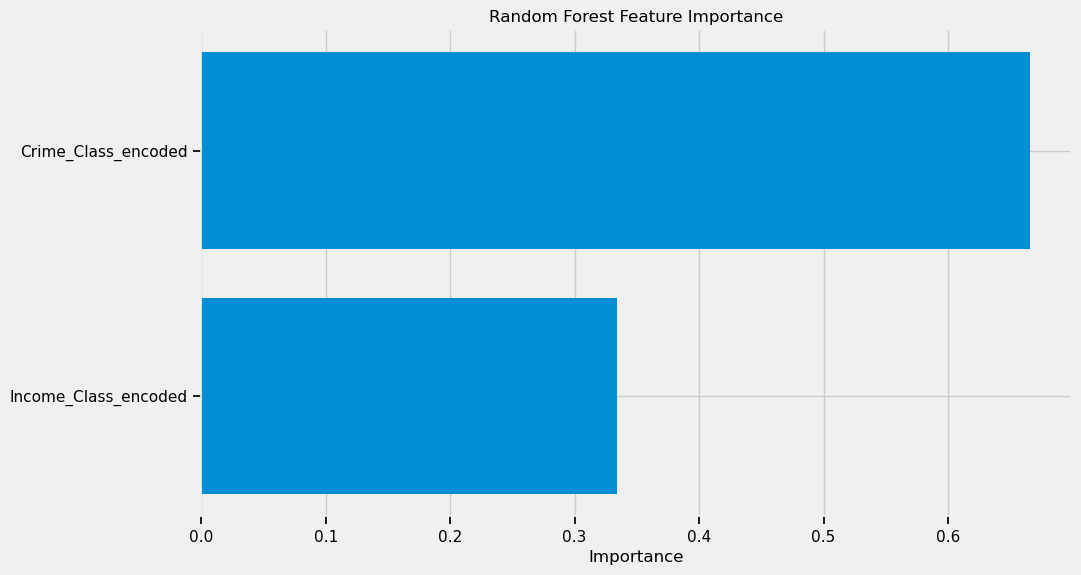

In [33]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances along with their feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top Features Based on Importance:")
print(feature_importance_df.head())

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


In [ ]:
## Crime has more relation to price than income for Vancouver. 